# T1.1: MNIST

## mnist_cnn.py


ssh -o ProxyCommand="ssh -g -L 8889:localhost:8889 s4451856@sshgw.leidenuniv.nl -q -W U0065090:22" -g -L 8889:localhost:8889 s4451856@U0065090

In [1]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

2024-11-01 19:57:51.005798: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 19:57:51.024077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 19:57:51.032542: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 19:57:51.035043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-01 19:57:51.042000: I tensorflow/core/platform/cpu_feature_guar

In [2]:
batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730487478.747374 3581102 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730487478.782241 3581102 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730487478.7823

Epoch 1/50


I0000 00:00:1730487479.748812 3581215 service.cc:146] XLA service 0x7f816c0036a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730487479.748832 3581215 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-11-01 19:57:59.762821: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-01 19:57:59.885696: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-11-01 19:57:59.969713: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility

 67/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1152 - loss: 2.3048

I0000 00:00:1730487482.060623 3581215 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1280 - loss: 2.2982 - val_accuracy: 0.3151 - val_loss: 2.2567
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2331 - loss: 2.2511 - val_accuracy: 0.5314 - val_loss: 2.1986
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3419 - loss: 2.1949 - val_accuracy: 0.6429 - val_loss: 2.1204
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4244 - loss: 2.1180 - val_accuracy: 0.6949 - val_loss: 2.0100
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4939 - loss: 2.0102 - val_accuracy: 0.7471 - val_loss: 1.8559
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5510 - loss: 1.8610 - val_accuracy: 0.7817 - val_loss: 1.6544
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5969 - loss: 1.6723 - val_accuracy: 0.7966 - val_loss: 1.4254
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6266 - loss: 1.4802 - val_accuracy: 0.8104 - val_

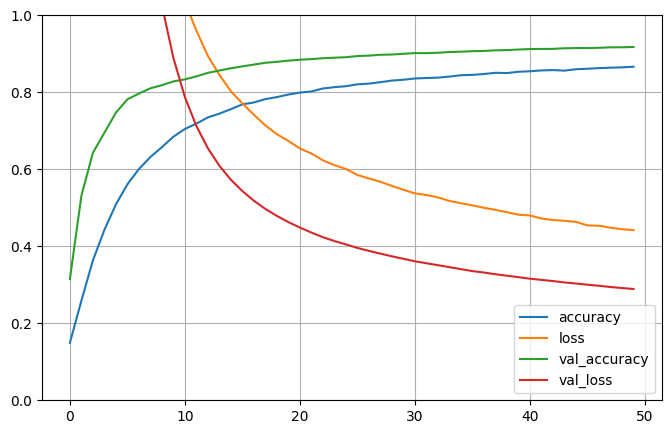

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## mnist_mlp.py


In [4]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [5]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8568 - loss: 0.4525

2024-11-01 19:59:49.397288: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 12 bytes spill stores, 12 bytes spill loads

2024-11-01 19:59:49.444985: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 184 bytes spill stores, 184 bytes spill loads

2024-11-01 19:59:49.507267: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 336 bytes spill stores, 288 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8569 - loss: 0.4521 - val_accuracy: 0.9613 - val_loss: 0.1204
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1072 - val_accuracy: 0.9752 - val_loss: 0.0791
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9769 - loss: 0.0738 - val_accuracy: 0.9795 - val_loss: 0.0704
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9818 - loss: 0.0575 - val_accuracy: 0.9777 - val_loss: 0.0761
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.0491 - val_accuracy: 0.9757 - val_loss: 0.0876
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9865 - loss: 0.0413 - val_accuracy: 0.9786 - val_loss: 0.0761
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0321 - val_accuracy: 0.9811 - val_loss: 0.0697
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9911 - loss: 0.0293 - val_accuracy: 0.9834 - val_

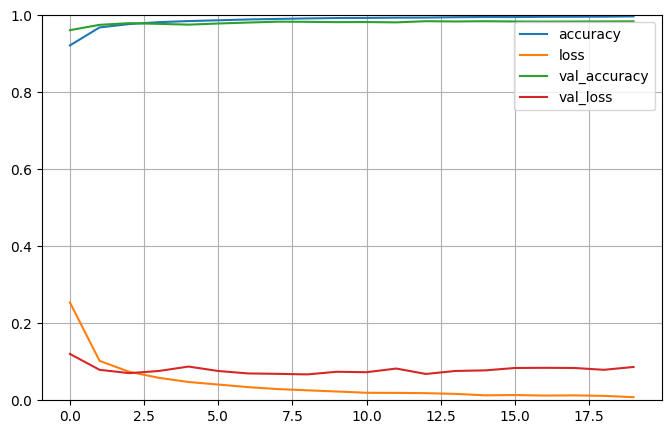

In [6]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# T1.2: Fashion MNIST

## (a) Multi-Layer Perceptron

In [7]:
import os
from keras import regularizers
os.environ["KERAS_BACKEND"] = "tensorflow"

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

classNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


def MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5):

  MLPModel = Sequential()
  MLPModel.add(keras.layers.Flatten(input_shape=[28, 28]))

  for i in range(hiddenLayers):
    MLPModel.add(keras.layers.Dense(300, activation=hiddenActivation))
    
    MLPModel.add(keras.layers.Dense(100, activation=hiddenActivation))


  MLPModel.add(keras.layers.Dense(10, activation=outputActivation))

  MLPModel.compile(loss="sparse_categorical_crossentropy",
  optimizer=optimiser,
  metrics=["accuracy"])

  history = MLPModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

  test_loss, test_acc = MLPModel.evaluate(xTest,  yTest, verbose=2)
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc

## (b) Convolutional Neural Network

In [71]:
def CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 hiddenActivation="relu",
                 convActivation="relu",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5,
                 inputShape=(28, 28, 1),
                 outputShape=10,
                 lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(32, (3, 3), activation=convActivation, input_shape=inputShape))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation=convActivation))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(64, activation=hiddenActivation))

  CNNModel.add(Dense(outputShape, activation=outputActivation))

  CNNModel.compile(optimizer=optimiser,
                loss=lossFunction,
                metrics=['accuracy'])

  #CNNModel.summary()
  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))
  
  print(history.history)

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

  #print(CNNModel.predict(xVal))

  val_loss, val_acc = CNNModel.evaluate(xVal,  yVal, verbose=2)
  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Output Activation: {outputActivation}")
  print(f"Hidden Activation: {hiddenActivation}")
  print(f"Conv Activation: {convActivation}")
  #print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_acc}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc, val_acc

## Experimentation and Evaluation

### MLP Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 1

Optimiser: Adam

Output Activation: SoftPlus

Hidden Activation: Tanh

Alpha:  5

Epochs: 30

Test accuracy: 0.8705999851226807

In [42]:
def eval(model, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=False,
         inputShape=(28, 28, 1), outputShape=10,
         lossFunction=keras.losses.SparseCategoricalCrossentropy(from_logits=True)):
    # Epochs
    bestEpochs = (50, 0, 0)
    for epochs in [20, 25, 30, 35, 40, 45, 50]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                  epochs=epochs)

        if val_acc > bestEpochs[2]:
            bestEpochs = (epochs, test_acc, val_acc)

        else:
            break


    # Optimiser
    bestOptimiser = ("Adam", 0, 0)
    for optimiser in ["SGD",
                    "RMSprop",
                    "Adam",
                    "AdamW",
                    "Adadelta",
                    "Adagrad",
                    "Adamax",
                    "Adafactor",
                    "Nadam",
                    "Ftrl",
                    "Lion"]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                epochs=bestEpochs[0],
                                optimiser=optimiser)

        if val_acc > bestOptimiser[2]:
            bestOptimiser = (optimiser, test_acc, val_acc)


    # Output activation function
    bestOutActivation = ("softplus", 0, 0)
    for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
                    "tanh", "selu", "elu", "exponential"]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                outputActivation=activation,
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])

        if val_acc > bestOutActivation[2]:
            bestOutActivation = (activation, test_acc, val_acc)


    # Hidden Layer activation function
    bestHiddenActivation = ("tanh", 0, 0)
    for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
                    "tanh", "selu", "elu", "exponential"]:
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                outputActivation=bestOutActivation[0],
                                hiddenActivation=activation,
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])

        if val_acc > bestHiddenActivation[2]:
            bestHiddenActivation = (activation, test_acc, val_acc)

    
    # Convolutional layer Activation Function
    bestConvActivation = ("relu", 0, 0)
    if CNN:
        for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
                        "tanh", "selu", "elu", "exponential"]:
            test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                             inputShape=inputShape, outputShape=outputShape,
                                             lossFunction=lossFunction,
                                            outputActivation=bestOutActivation[0],
                                            hiddenActivation=bestHiddenActivation[0],
                                            convActivation=activation,
                                            epochs=bestEpochs[0],
                                            optimiser=bestOptimiser[0])

            if val_acc > bestConvActivation[2]:
                bestConvActivation = (activation, test_acc, val_acc)


    # Hidden Layers
    bestHidden = (1, 0, 0)
    accuracyList = []
    for layers in range(1, 50):
        test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
                                  inputShape=inputShape, outputShape=outputShape,
                                  lossFunction=lossFunction,
                                hiddenLayers=layers,
                                outputActivation=bestOutActivation[0],
                                hiddenActivation=bestHiddenActivation[0],
                                epochs=bestEpochs[0],
                                optimiser=bestOptimiser[0])
    
        accuracyList.append(val_acc)

        if val_acc > bestHidden[2]:
            bestHidden = (layers, test_acc, val_acc)

    
    


    # Regularisations
    bestAlpha = (0, 0, 0)
    #alphas = np.logspace(-10, -2, 200)
    #for alpha in alphas:
    #  test_acc, val_acc = model(xTrain, yTrain, xVal, yVal, xTest, yTest,
    #                          hiddenLayers=bestHidden[0],
    #                          outputActivation=bestOutActivation[0],
    #                          hiddenActivation=bestHiddenActivation[0],
    #                          epochs=bestEpochs[0],
    #                          optimiser=bestOptimiser[0],
    #                          alpha=alpha)

    #  if accuracy > bestAlpha[2]:
    #   bestAlpha = (alpha, accuracy)

    print(f"Best Hidden layers: {bestHidden[0]}")
    print(f"Best Optimiser: {bestOptimiser[0]}")
    print(f"Best Output Activation: {bestOutActivation[0]}")
    print(f"Best Hidden Activation: {bestHiddenActivation[0]}")
    print(f"Best Conv Activation: {bestConvActivation[0]}")
    print(f"Best Epochs: {bestEpochs[0]}")
    print(f"Final Val accuracy: {bestHidden[2]}")
    print(f"Final Test accuracy: {bestHidden[1]}")

    plt.figure()
    plt.plot(accuracyList, range(len(accuracyList)))
    plt.show()

    return {"bestHidden": bestHidden[0], "bestOptimiser": bestOptimiser[0],
            "bestOutActivation": bestOutActivation[0],
            "bestHiddenActivation": bestOutActivation[0],
            "bestEpochs": bestEpochs[0]}

Epoch 1/20


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-01 20:00:08.649142: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45', 36 bytes spill stores, 36 bytes spill loads

2024-11-01 20:00:08.683533: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_212', 16 bytes spill stores, 16 bytes spill loads

2024-11-01 20:00:08.713165: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_212', 16 bytes spill stores

1703/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.7005 - loss: 0.9660

2024-11-01 20:00:11.174866: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_212', 16 bytes spill stores, 16 bytes spill loads

2024-11-01 20:00:11.193416: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_212', 20 bytes spill stores, 20 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7012 - loss: 0.9633 - val_accuracy: 0.8052 - val_loss: 0.5500
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.8271 - loss: 0.4948 - val_accuracy: 0.8418 - val_loss: 0.4602
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8407 - loss: 0.4520 - val_accuracy: 0.8560 - val_loss: 0.4140
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8536 - loss: 0.4200 - val_accuracy: 0.8464 - val_loss: 0.4409
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8598 - loss: 0.4004 - val_accuracy: 0.8678 - val_loss: 0.3834
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8645 - loss: 0.3848 - val_accuracy: 0.8738 - val_loss: 0.3632
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8730 - loss: 0.3600 - val_accuracy: 0.8618 - val_loss: 0.3926
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.8753 - loss: 0.3540 - val_a

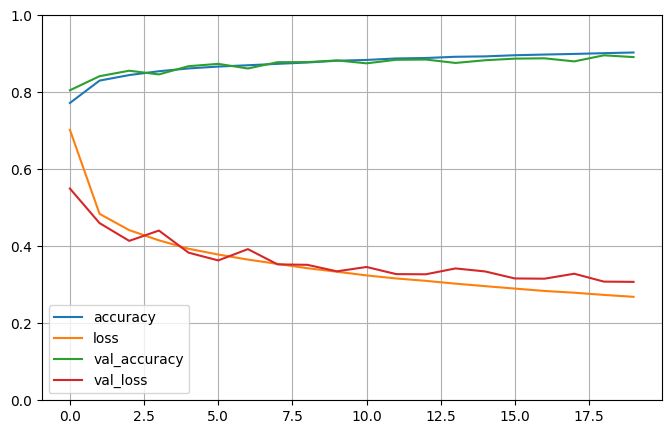

313/313 - 1s - 4ms/step - accuracy: 0.8287 - loss: 71.2435
Hidden layers: 1
Optimiser: sgd
Output Activation: softmax
Hidden Activation: relu
Alpha: 5
Epochs: 20
Test loss: 71.24345397949219
Test accuracy: 0.8287000060081482
Epoch 1/25


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6779 - loss: 1.0093 - val_accuracy: 0.8196 - val_loss: 0.5166
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8255 - loss: 0.5028 - val_accuracy: 0.8522 - val_loss: 0.4350
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8471 - loss: 0.4483 - val_accuracy: 0.8572 - val_loss: 0.4228
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8510 - loss: 0.4211 - val_accuracy: 0.8676 - val_loss: 0.3966
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.8632 - loss: 0.3912 - val_accuracy: 0.8708 - val_loss: 0.3866
Epoch 6/25
1481/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.8663 - loss: 0.3792

KeyboardInterrupt: 

In [10]:
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

# MLP model eval
bestSettings = eval(MLPModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest)
print(bestSettings)


### CNN Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 2

Optimiser: Adamax

Output Activation: elu

Hidden Activation: sigmoid

Conv Activation: relu

Epochs: 30

Test loss: 0.3733844459056854

Test accuracy: 0.8733000159263611

In [36]:
# CNN model eval
bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True)
print(bestSettings)

Best Hidden layers: 2
Best Optimiser: Adamax
Best Output Activation: elu
Best Hidden Activation: sigmoid
Best Convolutional Activation: relu
Best Epochs: 30
Final Test accuracy: 0


: 

: 

### CIFAR-10

In [11]:
cifar = keras.datasets.cifar10
(xTrainFull, yTrainFull), (xTest, yTest) = cifar.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2186 - loss: 2.0889 - val_accuracy: 0.3942 - val_loss: 1.6767
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4040 - loss: 1.6336 - val_accuracy: 0.4630 - val_loss: 1.4871
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4724 - loss: 1.4548 - val_accuracy: 0.5140 - val_loss: 1.3554
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5212 - loss: 1.3306 - val_accuracy: 0.5556 - val_loss: 1.2356
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5598 - loss: 1.2380 - val_accuracy: 0.5768 - val_loss: 1.1918
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5868 - loss: 1.1543 - val_accuracy: 0.5942 - val_loss: 1.1503
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6179 - loss: 1.0828 - val_accuracy: 0.6284 - val_loss: 1.0532
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6363 - loss: 1.0261 - 

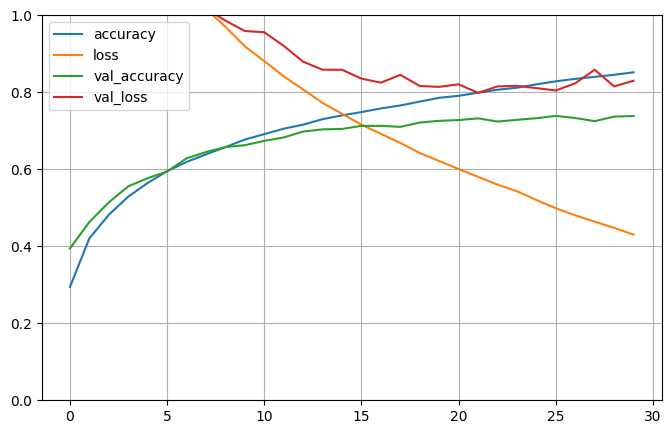

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[-0.9380355  -0.9677594   2.4196448  ... -0.32585365 -0.9036494
  -0.6813639 ]
 [ 1.9887094   2.2759967   0.21670085 ...  2.5167992   1.6110954
   8.821737  ]
 [ 1.6281984   2.9375904  -0.47198826 ... -0.42359927  3.9749403
   6.1452827 ]
 ...
 [-0.7871862  -0.8028617  -0.26957917 ... -0.79063684  0.52774817
   1.2293673 ]
 [-0.56382054 -0.99855167  5.3207054  ...  4.9019833  -0.993149
  -0.9721245 ]
 [-0.9138071  -0.99336004  4.607959   ... -0.71396863 -0.04168497
  -0.9667674 ]]
157/157 - 0s - 524us/step - accuracy: 0.7384 - loss: 0.8300
313/313 - 1s - 3ms/step - accuracy: 0.5573 - loss: 1.7743
Hidden layers: 2
Optimiser: adamax
Output Activation: elu
Hidden Activation: sigmoid
Conv Activation: relu
Epochs: 30
Validation loss: 0.8300354480743408
Validation accuracy: 0.7383999824523926
Test loss: 1.7742644548416138
Test accuracy: 0.5572999715805054
0.5572999715805054 0.7383999824523926


In [12]:
#Hidden layers: 2
#Optimiser: Adamax
#Output Activation: elu
#Hidden Activation: sigmoid
#Conv Activation: relu
#Epochs: 30
#Test loss: 0.3733844459056854
#Test accuracy: 0.8733000159263611

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="elu",
                          hiddenActivation="sigmoid",
                          convActivation="relu",
                          epochs=30,
                          optimiser="adamax",
                          inputShape=(32, 32, 3))

print(test_acc, val_acc)

# T2.1 Tell-the-time Network

## (a) Classification

[[[[0.63529412]
   [0.65490196]
   [0.59607843]
   ...
   [0.39607843]
   [0.43921569]
   [0.43921569]]

  [[0.58431373]
   [0.60784314]
   [0.56470588]
   ...
   [0.44313725]
   [0.42352941]
   [0.44705882]]

  [[0.56862745]
   [0.56470588]
   [0.55686275]
   ...
   [0.41568627]
   [0.40392157]
   [0.42352941]]

  ...

  [[0.45490196]
   [0.4627451 ]
   [0.44705882]
   ...
   [0.4       ]
   [0.34117647]
   [0.36078431]]

  [[0.48627451]
   [0.46666667]
   [0.44705882]
   ...
   [0.43137255]
   [0.45490196]
   [0.41176471]]

  [[0.48627451]
   [0.49019608]
   [0.4745098 ]
   ...
   [0.32941176]
   [0.30980392]
   [0.50196078]]]


 [[[0.27058824]
   [0.2745098 ]
   [0.2745098 ]
   ...
   [0.54117647]
   [0.48235294]
   [0.50588235]]

  [[0.28627451]
   [0.29411765]
   [0.2745098 ]
   ...
   [0.49803922]
   [0.5254902 ]
   [0.54509804]]

  [[0.27843137]
   [0.28627451]
   [0.2627451 ]
   ...
   [0.54117647]
   [0.55294118]
   [0.56470588]]

  ...

  [[0.44313725]
   [0.4627451 ]
   [0.4

/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0821 - loss: 2.6523 - val_accuracy: 0.0817 - val_loss: 2.5590
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0847 - loss: 2.5582 - val_accuracy: 0.0917 - val_loss: 2.5424
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0849 - loss: 2.5546 - val_accuracy: 0.0828 - val_loss: 2.5446
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0854 - loss: 2.5486 - val_accuracy: 0.1217 - val_loss: 2.4864
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1493 - loss: 2.3645 - val_accuracy: 0.2689 - val_loss: 1.9597
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3473 - loss: 1.6942 - val_accuracy: 0.4983 - val_loss: 1.2796
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5536 - loss: 1.1492 - val_accuracy: 0.5722 - val_loss: 1.0685
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6688 - loss: 0.8185 - val_accuracy: 0.6711 - val_

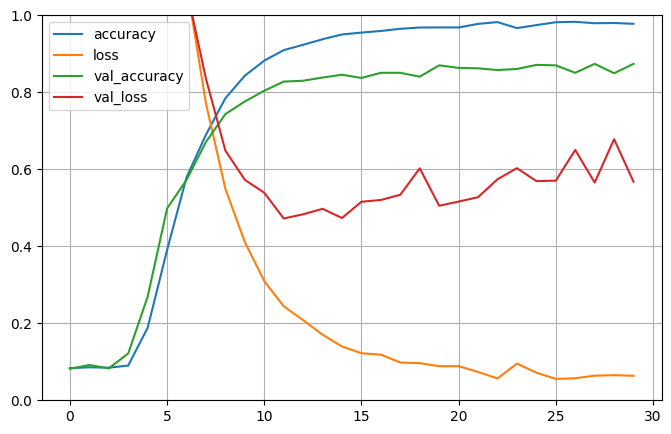

57/57 - 0s - 835us/step - accuracy: 0.8739 - loss: 0.5675
57/57 - 0s - 796us/step - accuracy: 0.8750 - loss: 0.6083
Hidden layers: 2
Optimiser: adam
Output Activation: softmax
Hidden Activation: relu
Conv Activation: relu
Epochs: 30
Validation loss: 0.5675389170646667
Validation accuracy: 0.8738889098167419
Test loss: 0.6082863807678223
Test accuracy: 0.875
0.875 0.8738889098167419


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([int(time[0] + (time[1] // 30)) for time in ySmallClock])  

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

print(xTrain, yTrain)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="softmax",
                          hiddenActivation="relu",
                          convActivation="relu",
                          epochs=30,
                          optimiser="adam",
                          inputShape=(75, 75, 1),
                          outputShape=24)

print(test_acc, val_acc)

## (b) Regression

In [69]:
import tensorflow as tf
from tensorflow.keras import Loss

xSmallClock = np.load("data/75/images.npy")
ySmallClock = np.load("data/75/labels.npy")

ySmallClock = np.array([float(time[0] + (time[1] / 60)) for time in ySmallClock])

xSmallClock = np.reshape(xSmallClock, (-1, 75, 75, 1))
xSmallClock = xSmallClock / 255.0

class circularLoss(Loss):
    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.abs(tf.atan2(tf.sin(y_true - y_pred), tf.cos(y_true - y_pred))))
    
xTrain, xTest, yTrain, yTest = train_test_split(xSmallClock,
                                                ySmallClock,
                                                test_size=0.2)
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.5)

print(xTrain, yTrain)

test_acc, val_acc = CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=2,
                          outputActivation="softmax",
                          hiddenActivation="relu",
                          convActivation="relu",
                          epochs=30,
                          optimiser="adam",
                          inputShape=(75, 75, 1),
                          outputShape=1,
                          lossFunction=circularLoss)

print(test_acc, val_acc)

#bestSettings = eval(CNNModelTest, xTrain, yTrain, xVal, yVal, xTest, yTest, CNN=True,
                    #inputShape=(75, 75, 1), outputShape=1, lossFunction=circularLoss)
#print(bestSettings)

[[[[0.56862745]
   [0.57254902]
   [0.58039216]
   ...
   [0.52156863]
   [0.61176471]
   [0.5372549 ]]

  [[0.59215686]
   [0.57254902]
   [0.58823529]
   ...
   [0.56862745]
   [0.56862745]
   [0.54509804]]

  [[0.57647059]
   [0.59215686]
   [0.54901961]
   ...
   [0.63529412]
   [0.54901961]
   [0.61176471]]

  ...

  [[0.39607843]
   [0.47843137]
   [0.40392157]
   ...
   [0.35294118]
   [0.36862745]
   [0.38039216]]

  [[0.43921569]
   [0.43921569]
   [0.41960784]
   ...
   [0.38039216]
   [0.4       ]
   [0.37647059]]

  [[0.45490196]
   [0.42352941]
   [0.40392157]
   ...
   [0.39607843]
   [0.40784314]
   [0.40784314]]]


 [[[0.48235294]
   [0.4627451 ]
   [0.41568627]
   ...
   [0.25882353]
   [0.30980392]
   [0.41568627]]

  [[0.48627451]
   [0.45882353]
   [0.43137255]
   ...
   [0.25490196]
   [0.30588235]
   [0.43529412]]

  [[0.49411765]
   [0.45490196]
   [0.45882353]
   ...
   [0.3254902 ]
   [0.27843137]
   [0.38039216]]

  ...

  [[0.54509804]
   [0.59215686]
   [0.5

KeyboardInterrupt: 